In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

In [3]:
import pandas 
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
%matplotlib inline

In [4]:
def grab_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224)) 
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Grab training images
image_data = np.concatenate( 
    [grab_image('Project_images/image%d.tif'%(i))
    for i in range(1,1251)]) 
image_data.shape

(1250, 224, 224, 3)

In [5]:
# Split image data into training and testing sets (84%, 16%)
x_train = image_data[0:1050]
x_test = image_data[1050:1250]

print("x_train:",x_train.shape)
print("x_test",x_test.shape)

x_train: (1050, 224, 224, 3)
x_test (200, 224, 224, 3)


In [6]:
# Read in data labels
label_data = np.loadtxt('Project_labels.csv')

# One-hot encode class vector [0-15] 
label_data = keras.utils.to_categorical(label_data)
display(label_data.shape)
display(label_data[0:10])

(1250, 16)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [7]:
# Split label data into training and testing sets (84% 16%)
y_train = label_data[0:1050]
y_test = label_data[1050:1250]
print("y_train:",y_train.shape)
print("y_test",y_test.shape)

y_train: (1050, 16)
y_test (200, 16)


In [8]:
## Standardize the -input- data between [-1.0,1.0] (real)
## instead of the default 0-255 (integer)
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(1050, 224, 224, 3)

(1050, 16)

(200, 224, 224, 3)

(200, 16)

In [9]:
# Build model
model=keras.Sequential()

model.add(keras.layers.Conv2D(36,kernel_size=(6,6),
                              activation='relu',input_shape=[x_train.shape[1],
                                                             x_train.shape[2],
                                                             x_train.shape[3]]))
model.add(keras.layers.Conv2D(40,(6,6),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(40,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(y_train.shape[1],activation='softmax'))

model.compile(loss = keras.losses.CategoricalCrossentropy(),
              optimizer = keras.optimizers.Adam(),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 219, 219, 36)      3924      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 214, 214, 40)      51880     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 107, 107, 40)      0         
_________________________________________________________________
dropout (Dropout)            (None, 107, 107, 40)      0         
_________________________________________________________________
flatten (Flatten)            (None, 457960)            0         
_________________________________________________________________
dense (Dense)                (None, 40)                18318440  
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0

In [10]:
#Train model
batch_size = 20
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_split = 0.2)

Epoch 1/10
42/42 [==============================] - 172s 4s/step - loss: 5.4399 - categorical_accuracy: 0.0827 - val_loss: 2.7569 - val_categorical_accuracy: 0.1476
Epoch 2/10
42/42 [==============================] - 173s 4s/step - loss: 2.7205 - categorical_accuracy: 0.1389 - val_loss: 2.7023 - val_categorical_accuracy: 0.1381
Epoch 3/10
42/42 [==============================] - 167s 4s/step - loss: 2.5384 - categorical_accuracy: 0.2150 - val_loss: 2.7015 - val_categorical_accuracy: 0.1095
Epoch 4/10
42/42 [==============================] - 168s 4s/step - loss: 2.3056 - categorical_accuracy: 0.2871 - val_loss: 2.6987 - val_categorical_accuracy: 0.1190
Epoch 5/10
42/42 [==============================] - 179s 4s/step - loss: 2.0331 - categorical_accuracy: 0.3741 - val_loss: 2.7390 - val_categorical_accuracy: 0.1476
Epoch 6/10
42/42 [==============================] - 170s 4s/step - loss: 1.7188 - categorical_accuracy: 0.4610 - val_loss: 3.0541 - val_categorical_accuracy: 0.1381
Epoch 7/10

In [11]:
# Testing
results = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

7/7 [==============================] - 4s 563ms/step - loss: 4.8096 - categorical_accuracy: 0.0550
Test loss: 4.809577465057373
Test accuracy: 0.054999999701976776


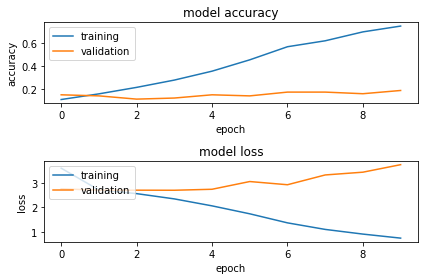

In [22]:
plt.figure()

# Summarize history for accuracy  
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='upper left')

# Summarize history for loss  
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
# Load the VGG16 model
vgg16 = keras.applications.VGG16(weights='imagenet', include_top=False)
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [14]:
# Use the VGG16 model as a base and add our own layers onto the bottom of it
base_model = vgg16

new_model = base_model.output
new_model=keras.layers.GlobalAveragePooling2D()(new_model)
new_model=keras.layers.Dense(30,activation='relu')(new_model)
new_model=keras.layers.Dense(16,activation='softmax')(new_model)
model=keras.Model(inputs=base_model.input,outputs=new_model)

model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.CategoricalAccuracy()])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [16]:
#Train model
batch_size = 20
epochs = 10
history2 = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_split = 0.2)

Epoch 1/10
42/42 [==============================] - 684s 16s/step - loss: 2.6767 - categorical_accuracy: 0.1226 - val_loss: 2.7329 - val_categorical_accuracy: 0.1143
Epoch 2/10
42/42 [==============================] - 886s 21s/step - loss: 2.6507 - categorical_accuracy: 0.1310 - val_loss: 2.7170 - val_categorical_accuracy: 0.1429
Epoch 3/10
42/42 [==============================] - 915s 22s/step - loss: 2.6316 - categorical_accuracy: 0.1202 - val_loss: 2.6931 - val_categorical_accuracy: 0.1143
Epoch 4/10
42/42 [==============================] - 918s 22s/step - loss: 2.6286 - categorical_accuracy: 0.1405 - val_loss: 2.7011 - val_categorical_accuracy: 0.1143
Epoch 5/10
42/42 [==============================] - 896s 21s/step - loss: 2.6179 - categorical_accuracy: 0.1286 - val_loss: 2.6943 - val_categorical_accuracy: 0.1143
Epoch 6/10
42/42 [==============================] - 905s 22s/step - loss: 2.6067 - categorical_accuracy: 0.1440 - val_loss: 2.7381 - val_categorical_accuracy: 0.1571
Epoc

In [17]:
# Testing
results = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

7/7 [==============================] - 30s 4s/step - loss: 2.8653 - categorical_accuracy: 0.0400
Test loss: 2.8652989864349365
Test accuracy: 0.03999999910593033


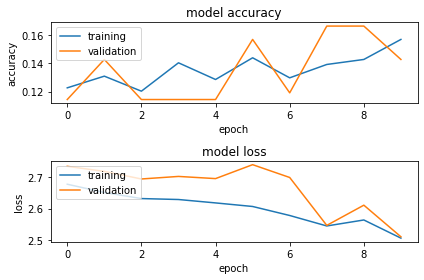

In [18]:
plt.figure()

# Summarize history for accuracy  
plt.subplot(211)
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='upper left')

# Summarize history for loss  
plt.subplot(212)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='upper left')
plt.tight_layout()
plt.show()

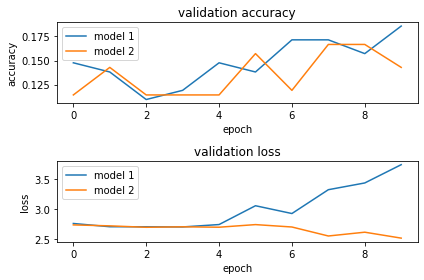

In [21]:
plt.figure()

plt.subplot(211)
plt.plot(history.history['val_categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.title('validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
# Model 1 respresents the simple CNN 
# Model 2 represents the CNN that uses transfer learning from VGG16
plt.legend(['model 1', 'model 2'],loc='upper left')

plt.subplot(212)
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.title('validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
# Model 1 respresents the simple CNN 
# Model 2 represents the CNN that uses transfer learning from VGG16
plt.legend(['model 1', 'model 2'],loc='upper left')
plt.tight_layout()
plt.show()